In [1]:
# dependencies
import pandas as pd
import os
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

In [2]:
# import CSV

df = pd.read_csv('cleaned_disorder.csv')
df.head()

,Unnamed: 0,Sex,Race,Age,Number of Bio. Parents,Number of Siblings,Poverty Status,Social Phobia,ADHD,CD,...,Number of Type A Stressors,Number of Type B Stressors,Frequency Temper Tantrums,Frequency Irritable Mood,Number of Sleep Disturbances,Number of Physical Symptoms,Number of Sensory Sensitivities,Family History - Substance Abuse,Family History - Psychiatric Diagnosis,disorder
0,0,1,0,2,1,1,0,1,0,0,...,1,1,27,396,4,3,2,0,0,GAD
1,1,0,1,2,0,3,1,0,1,0,...,3,2,282,1179,6,1,0,1,1,None
2,2,1,1,3,2,1,0,0,0,0,...,1,0,3,0,9,4,1,0,0,SAD
3,3,1,0,4,2,0,0,0,0,0,...,2,0,30,45,6,0,0,0,1,None
4,4,1,0,5,2,3,0,1,0,1,...,3,8,637,1170,10,5,2,0,0,Both


In [3]:
print(df.shape)

(287, 23)


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Sex,Race,Age,Number of Bio. Parents,Number of Siblings,Poverty Status,Social Phobia,ADHD,CD,Depression,...,Number of Type A Stressors,Number of Type B Stressors,Frequency Temper Tantrums,Frequency Irritable Mood,Number of Sleep Disturbances,Number of Physical Symptoms,Number of Sensory Sensitivities,Family History - Substance Abuse,Family History - Psychiatric Diagnosis,disorder
0,1,0,2,1,1,0,1,0,0,1,...,1,1,27,396,4,3,2,0,0,GAD
1,0,1,2,0,3,1,0,1,0,0,...,3,2,282,1179,6,1,0,1,1,None
2,1,1,3,2,1,0,0,0,0,0,...,1,0,3,0,9,4,1,0,0,SAD
3,1,0,4,2,0,0,0,0,0,0,...,2,0,30,45,6,0,0,0,1,None
4,1,0,5,2,3,0,1,0,1,1,...,3,8,637,1170,10,5,2,0,0,Both


In [5]:
# split into inputs and outputs
outcomes = df['disorder']
outcomes.head()

input_factors = df.drop(['disorder'], axis = 1)
input_factors.head()

,Sex,Race,Age,Number of Bio. Parents,Number of Siblings,Poverty Status,Social Phobia,ADHD,CD,Depression,...,Number of Impairments,Number of Type A Stressors,Number of Type B Stressors,Frequency Temper Tantrums,Frequency Irritable Mood,Number of Sleep Disturbances,Number of Physical Symptoms,Number of Sensory Sensitivities,Family History - Substance Abuse,Family History - Psychiatric Diagnosis
0,1,0,2,1,1,0,1,0,0,1,...,4,1,1,27,396,4,3,2,0,0
1,0,1,2,0,3,1,0,1,0,0,...,5,3,2,282,1179,6,1,0,1,1
2,1,1,3,2,1,0,0,0,0,0,...,0,1,0,3,0,9,4,1,0,0
3,1,0,4,2,0,0,0,0,0,0,...,0,2,0,30,45,6,0,0,0,1
4,1,0,5,2,3,0,1,0,1,1,...,7,3,8,637,1170,10,5,2,0,0


In [6]:
# Train/test Split
input_train, input_test, output_train, output_test = train_test_split(input_factors, outcomes, random_state=42)

In [7]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(input_train, output_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(input_test, output_test))

Test Acc: 0.736


In [10]:
 # Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(input_test)
print(classification_report(output_test, predictions))

              precision    recall  f1-score   support

        Both       1.00      0.40      0.57         5
         GAD       0.00      0.00      0.00         9
        None       0.73      1.00      0.84        51
         SAD       0.00      0.00      0.00         7

   micro avg       0.74      0.74      0.74        72
   macro avg       0.43      0.35      0.35        72
weighted avg       0.59      0.74      0.64        72



C:\Users\kelle\anaconda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


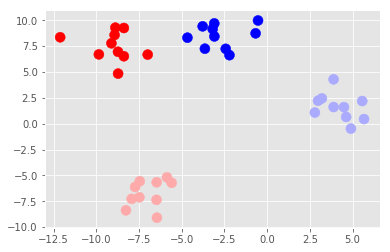

In [11]:
 from sklearn.datasets.samples_generator import make_blobs
input_factors, outcomes = make_blobs(n_samples=40, centers=4, random_state=42, cluster_std=1.25)
plt.scatter(input_factors[:, 0], input_factors[:, 1], c=outcomes, s=100, cmap="bwr");
plt.show()

In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(input_factors, outcomes)

In [ ]:
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
x_min = input_factors[:, 0].min()
x_max = input_factors[:, 0].max()
y_min = input_factors[:, 1].min()
y_max = input_factors[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(input_factors[:, 0], input_factors[:, 1], c=outcomes, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [ ]:
#Validation

In [ ]:
input_factors, outcomes = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(input_factors[:, 0], input_factors[:, 1], c=outcomes, s=100, cmap="bwr");
plt.show()

In [ ]:
 # Split data into training and testing
from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(input_factors, outcomes, random_state=42)

In [ ]:
 # Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(input_train, output_train)
predictions = model.predict(input_test)

In [ ]:
# Plot the decision boundaries
x_min = input_factors[:, 0].min()
x_max = input_factors[:, 0].max()
y_min = input_factors[:, 1].min()
y_max = input_factors[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(input_factors[:, 0], input_factors[:, 1], c=outcomes, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [ ]:
 # Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(output_test, predictions,
                           target_names=["blue", "red"]))